### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
creditcard_df = pd.read_csv('marketing_data.csv')

### EDA & PREPROCESSING

In [4]:
creditcard_df.shape

(8950, 18)

In [5]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [10]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### REPLACING NULLS

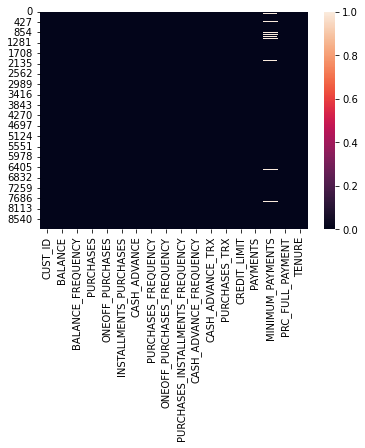

In [11]:
sns.heatmap(creditcard_df.isnull())

Null values in the 'MINIMUM_PAYMENTS'

In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

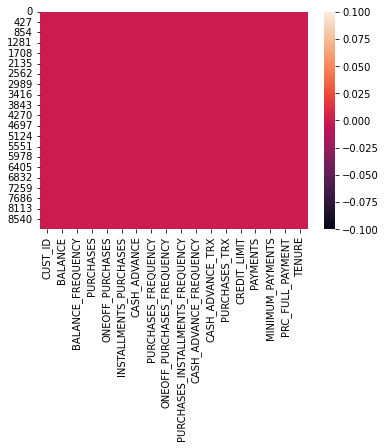

In [15]:
sns.heatmap(creditcard_df.isnull())

### FINDING DUPLICATES

In [16]:
creditcard_df.duplicated().sum()

0

### DROPPING UNECESSARY INFO

In [17]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### VISUALISATION AND EDA

In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

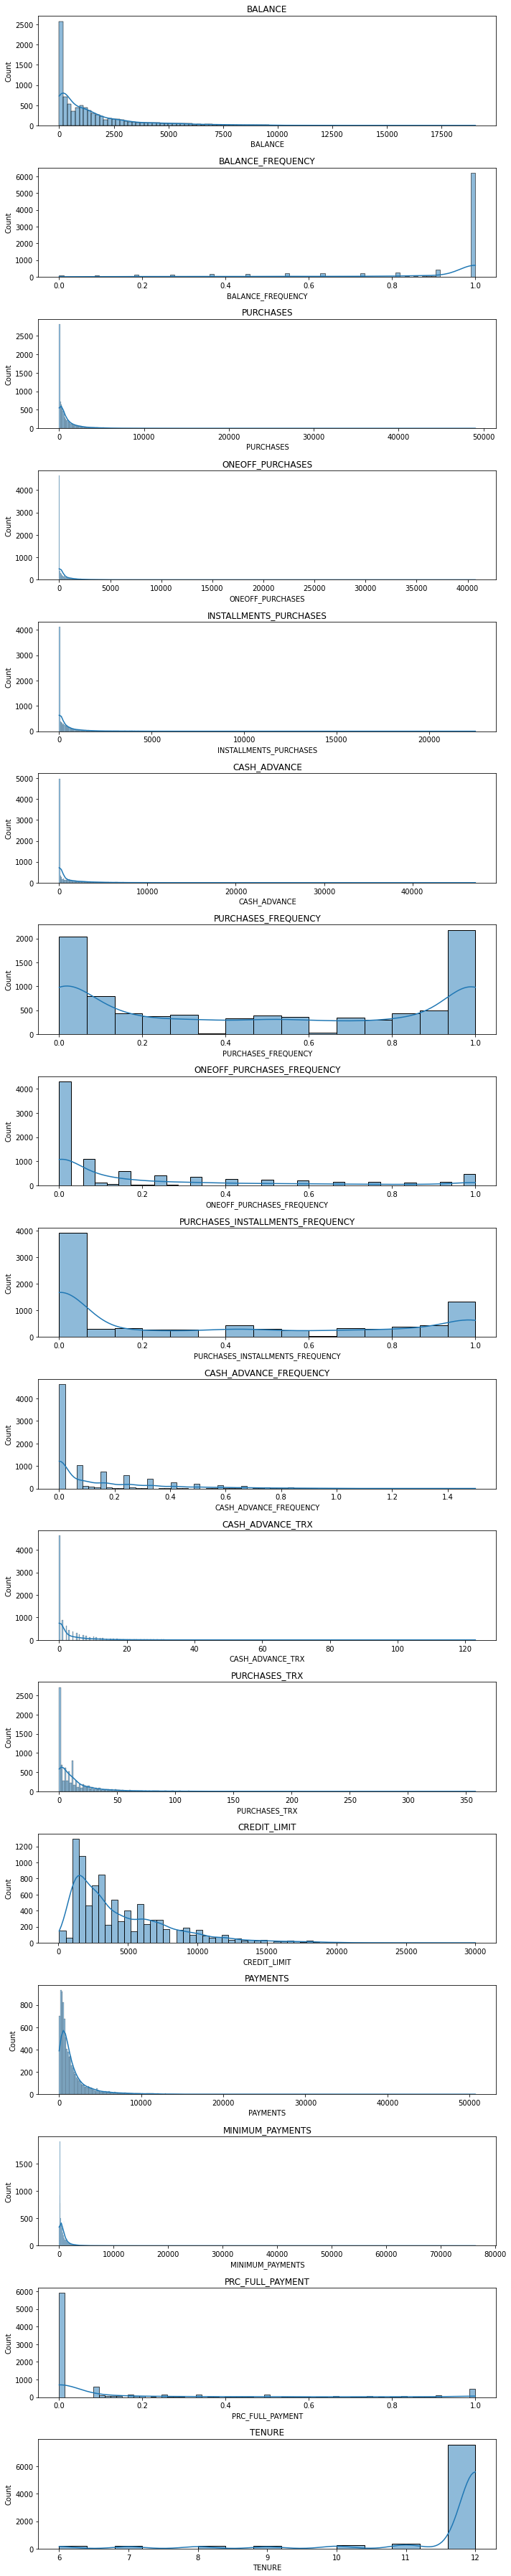

In [20]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [21]:
correlations = creditcard_df.corr()

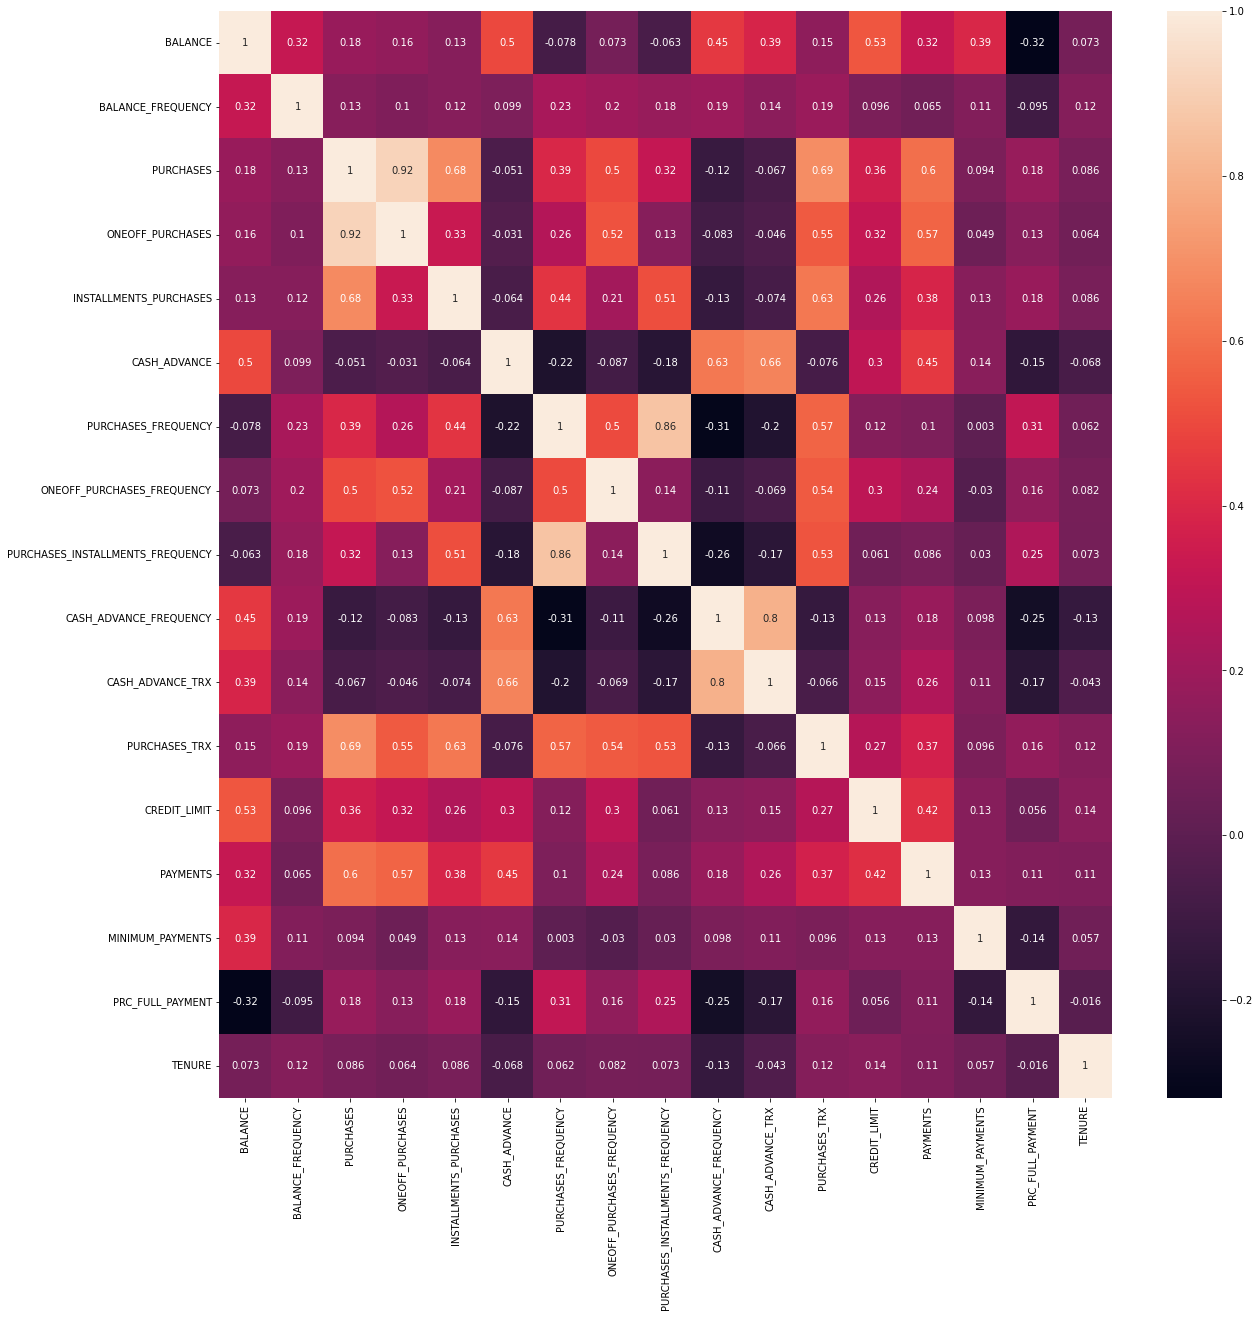

In [22]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

### DEFINING NUMBER OF CLUSTERS

In [23]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [24]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [26]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(creditcard_df_scaled)
        wcss_1.append(kmeans.inertia_)

In [27]:
print(wcss_1)

[152149.99999999983, 127784.9305142329, 111986.69806610125, 99073.93763633887, 91503.39081843363, 84855.82433419721, 79882.97530989832, 74494.75711887231, 70910.56180630275, 66465.99634922716, 63664.366893706116, 61357.125184408185, 59183.90067532685, 57480.037771860756, 55913.70581035795, 54661.871801462315, 52994.8578176163, 51954.986307452724, 50574.78441272571]


Text(0, 0.5, 'WCSS')

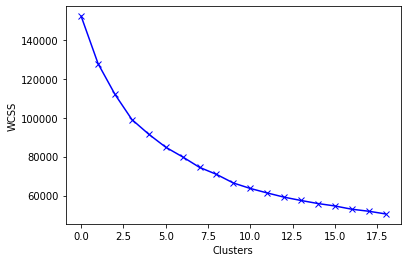

In [28]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Ideal number of clusters is around 7 and 8 clusters

### GROUPING WITH K-MEANS


In [29]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [30]:
labels, len(labels)

(array([2, 6, 1, ..., 3, 3, 3], dtype=int32), 8950)

In [31]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2015, 1122, 2754,  624,   25, 1181,  870,  359]))

In [32]:
kmeans.cluster_centers_

array([[-3.62612503e-01,  3.32334867e-01, -3.50802194e-02,
        -2.42449760e-01,  3.62285418e-01, -3.62187065e-01,
         9.92888888e-01, -3.84176198e-01,  1.20526509e+00,
        -4.72829373e-01, -3.59611178e-01,  1.88974837e-01,
        -2.61700556e-01, -2.14509627e-01, -3.63932707e-02,
         3.13612723e-01,  2.56206557e-01],
       [-1.39037550e-01,  3.99920526e-01,  5.38330752e-01,
         6.68736039e-01,  4.41086553e-02, -3.31727232e-01,
         9.77235233e-01,  1.90182500e+00,  1.66251524e-01,
        -4.15105484e-01, -3.30839924e-01,  6.14749099e-01,
         4.27126156e-01,  1.42408968e-01, -1.59198594e-01,
         4.47649105e-01,  2.68772874e-01],
       [ 1.35583021e-02,  4.04099536e-01, -3.57326458e-01,
        -2.41845526e-01, -4.00469725e-01, -9.52154173e-02,
        -8.53734173e-01, -3.94942483e-01, -7.55088046e-01,
         1.03110073e-01, -2.83152650e-02, -4.81846855e-01,
        -3.02445609e-01, -2.50655297e-01, -6.10063720e-03,
        -4.55671372e-01,  2.7

In [33]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.362613,0.332335,-0.035080,-0.242450,0.362285,-0.362187,0.992889,-0.384176,1.205265,-0.472829,-0.359611,0.188975,-0.261701,-0.214510,-0.036393,0.313613,0.256207
1,-0.139038,0.399921,0.538331,0.668736,0.044109,-0.331727,0.977235,1.901825,0.166252,-0.415105,-0.330840,0.614749,0.427126,0.142409,-0.159199,0.447649,0.268773
2,0.013558,0.404100,-0.357326,-0.241846,-0.400470,-0.095215,-0.853734,-0.394942,-0.755088,0.103110,-0.028315,-0.481847,-0.302446,-0.250655,-0.006101,-0.455671,0.273520
3,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
4,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
5,-0.701208,-2.141009,-0.310385,-0.234926,-0.302187,-0.322400,-0.554752,-0.442477,-0.439746,-0.521503,-0.376311,-0.419356,-0.175381,-0.201786,-0.256971,0.282604,0.201234
6,1.682157,0.392153,-0.218016,-0.155222,-0.230393,2.017706,-0.474110,-0.208263,-0.414911,1.920725,1.926782,-0.267494,1.028754,0.823636,0.508273,-0.389634,0.069513
7,1.056997,0.468804,2.454019,1.791470,2.511311,-0.161394,1.169439,1.558995,1.280411,-0.281078,-0.150752,3.108364,1.289471,1.421025,0.655700,0.243059,0.337784


In [34]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,809.727511,0.955998,928.255404,190.020426,738.677853,219.347919,0.888845,0.087850,0.843441,0.040526,0.794745,19.407040,3542.275757,1112.159501,779.393560,0.245441,11.860188
1,1275.079904,0.972008,2153.356783,1702.402228,450.954554,283.223611,0.882562,0.769809,0.430510,0.052077,0.991087,29.990196,6048.509156,2145.403859,493.200935,0.284644,11.877005
2,1592.695289,0.972998,239.771348,191.023332,48.927842,779.199934,0.147706,0.084639,0.064346,0.155778,3.055596,2.732922,3394.028585,1007.521328,849.989265,0.020439,11.883358
3,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,104.968575,0.370085,340.061778,202.509086,137.804005,302.783168,0.267702,0.070458,0.189671,0.030786,0.680779,4.286198,3856.341613,1148.993000,265.345972,0.236372,11.786622
6,5065.743521,0.970168,537.409897,334.800609,202.726149,5210.094501,0.300067,0.140329,0.199541,0.519501,16.397701,8.060920,8237.476489,4117.489913,2048.714531,0.039753,11.610345
7,3764.525849,0.988326,6246.254680,3565.910808,2682.015181,640.421072,0.959703,0.667536,0.873305,0.078898,2.220056,91.972145,9186.072423,5846.871854,2392.288581,0.224805,11.969359


In [35]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


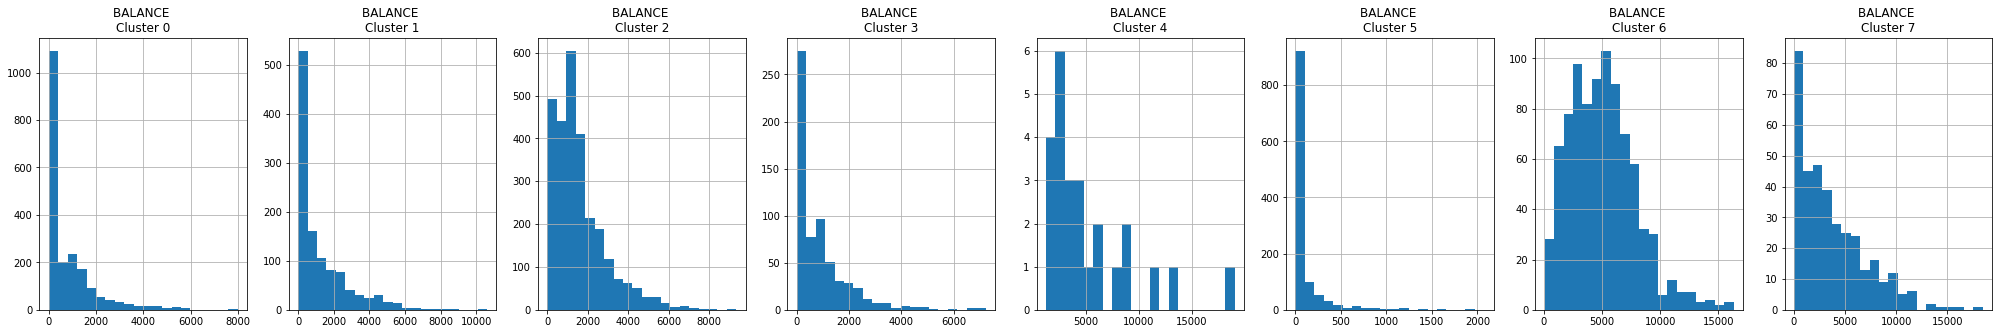

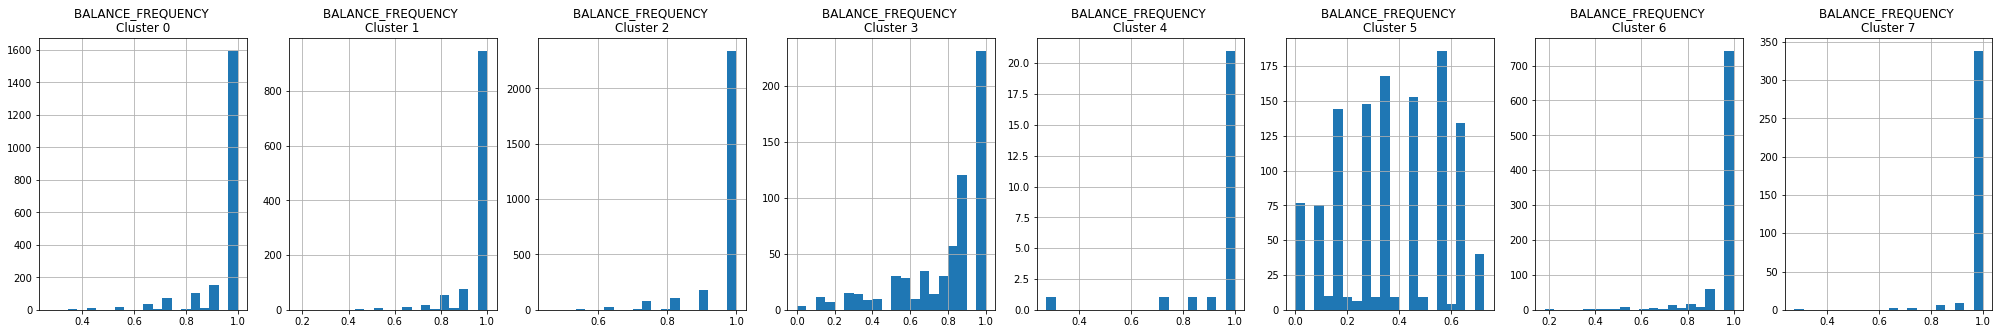

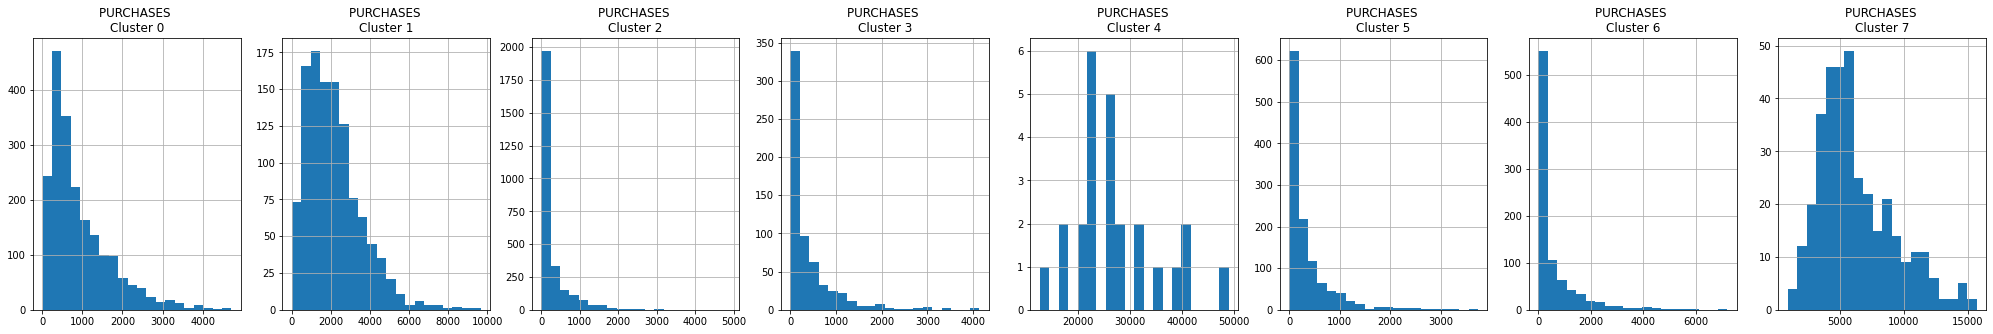

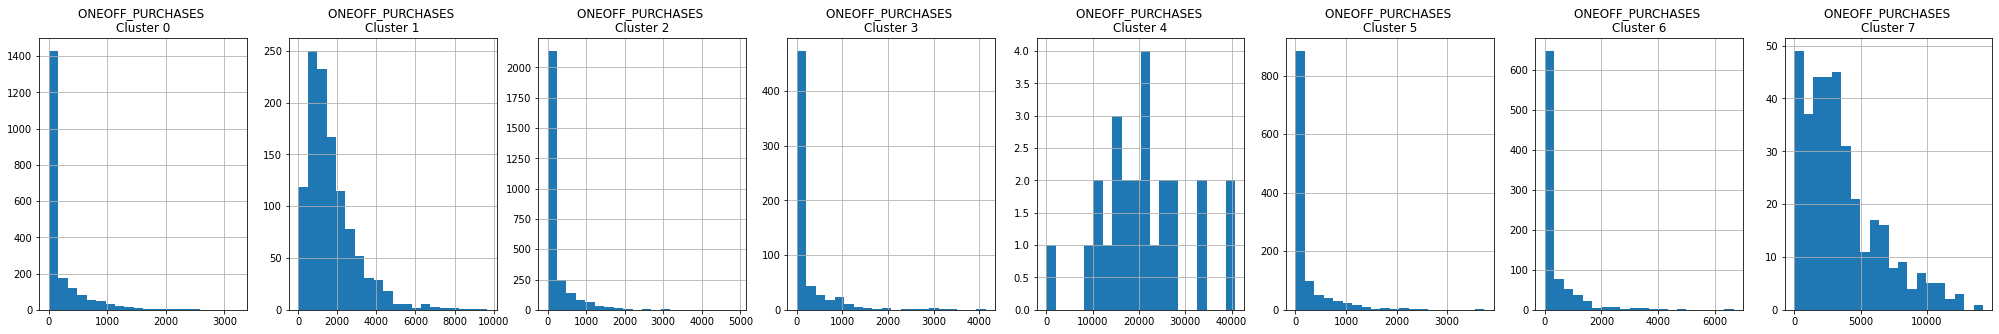

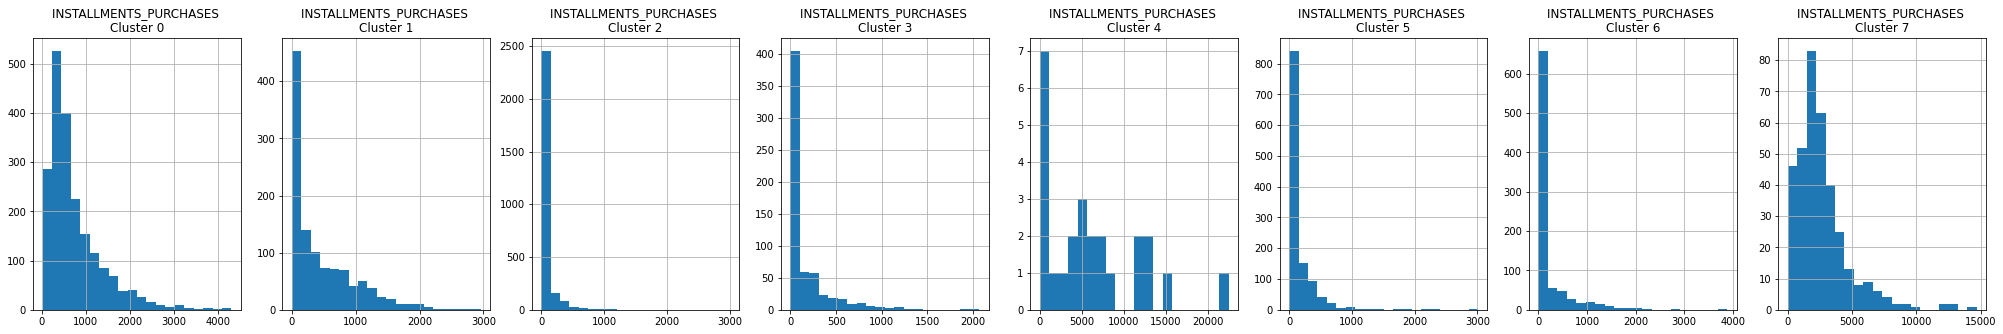

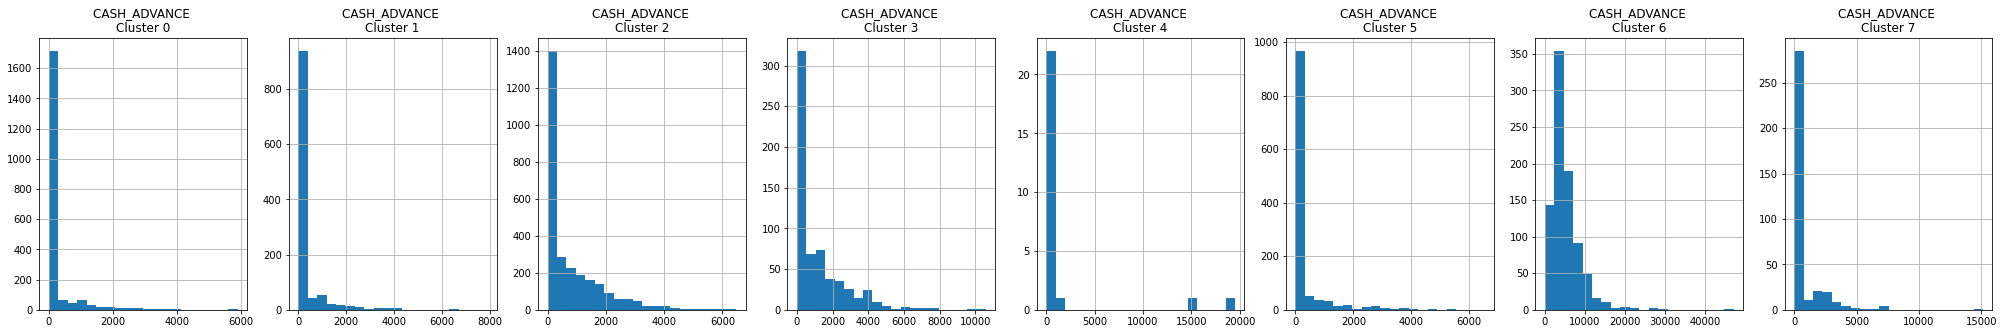

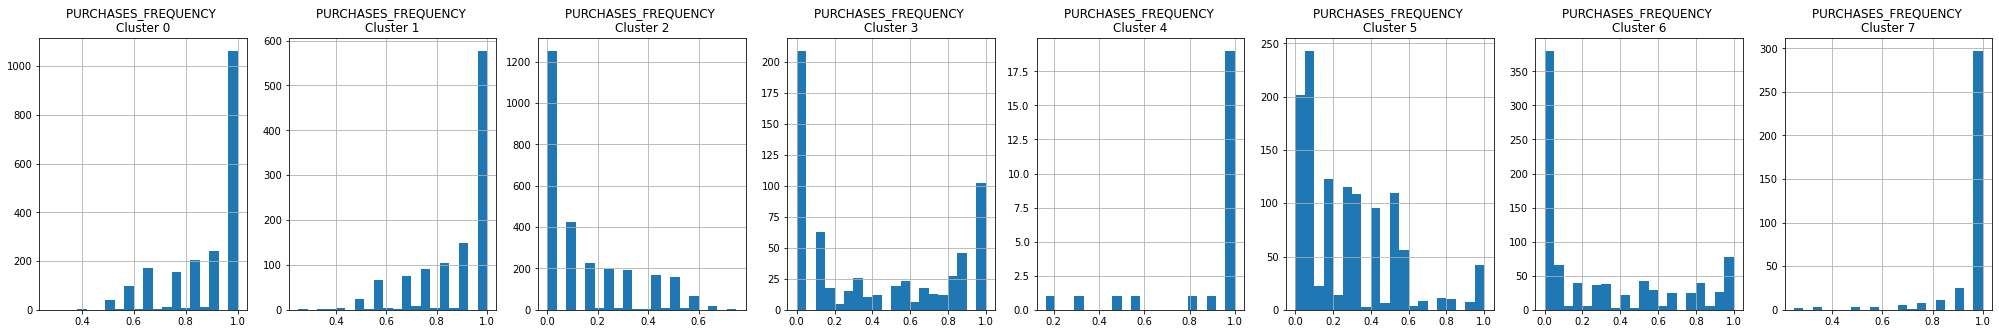

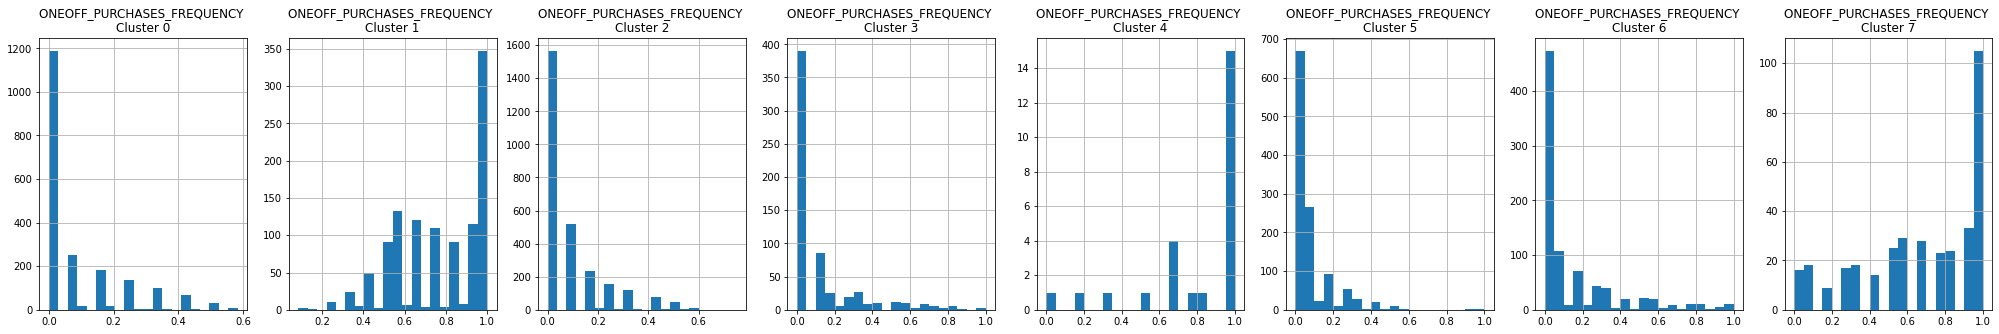

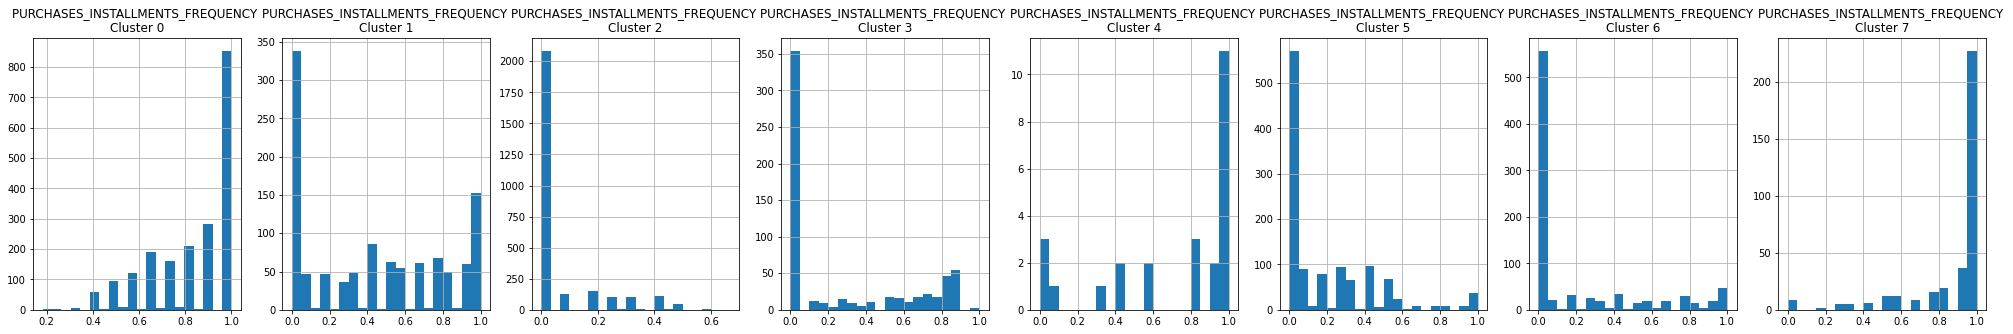

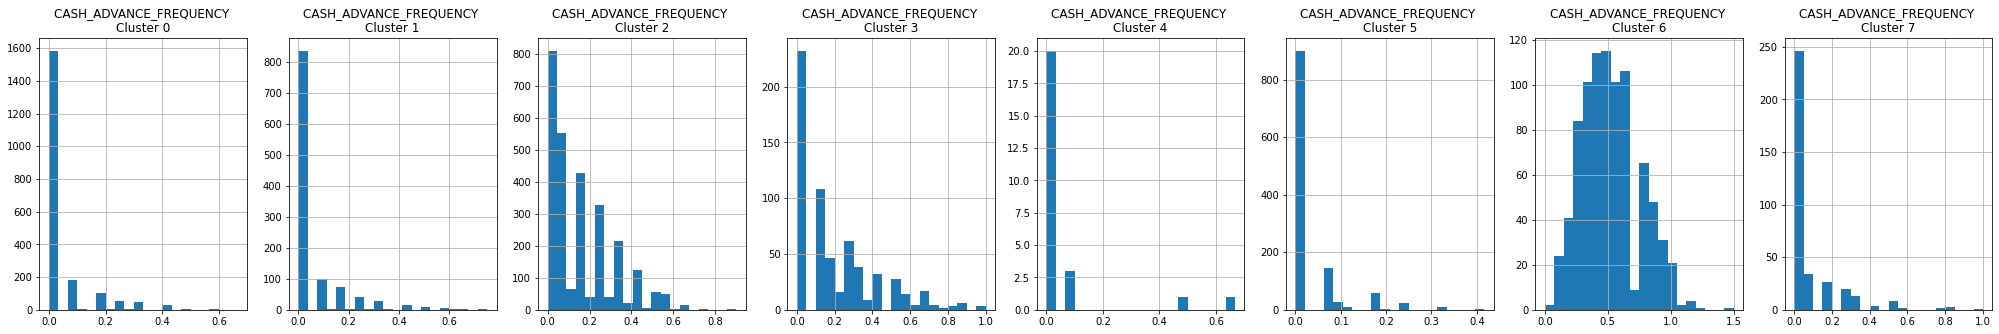

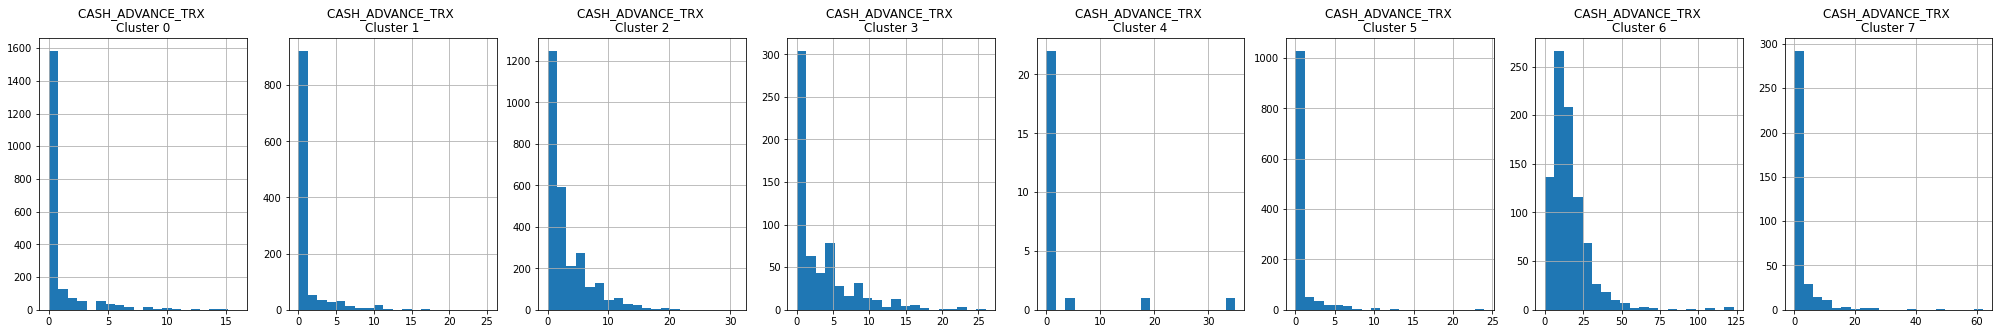

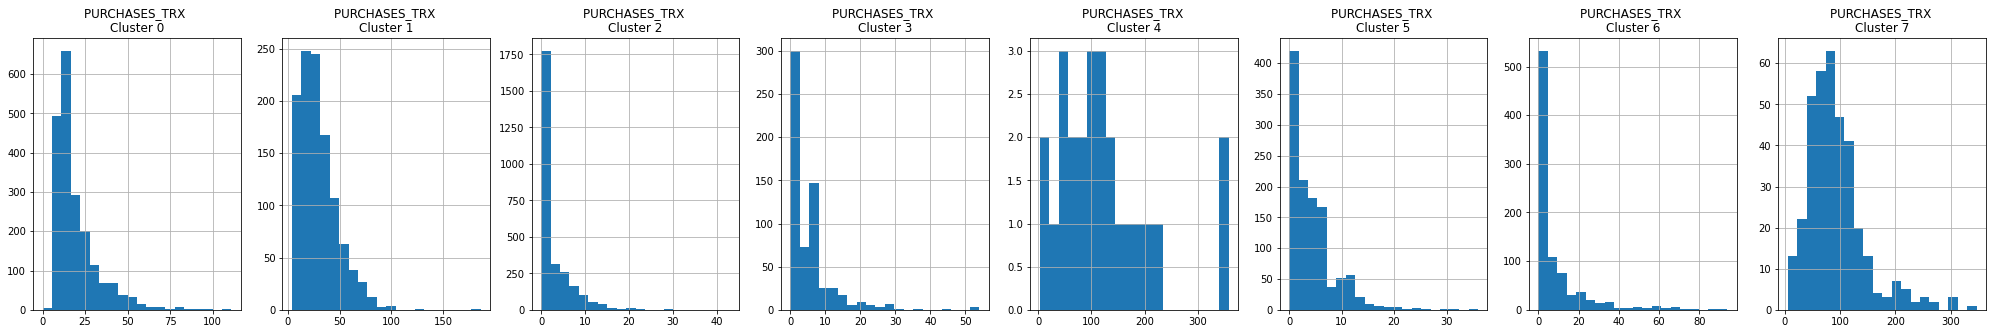

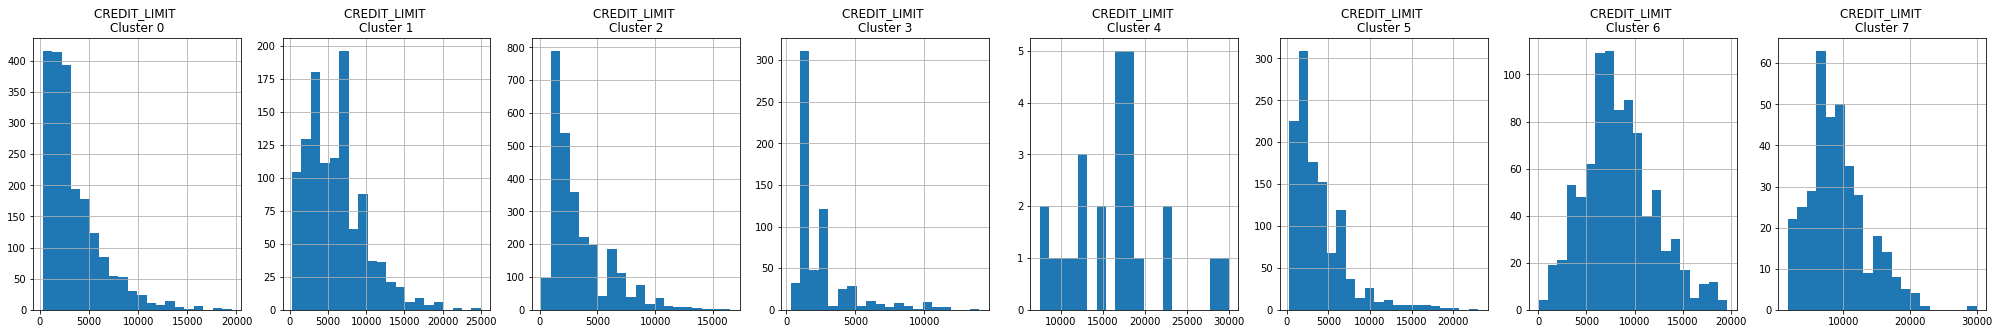

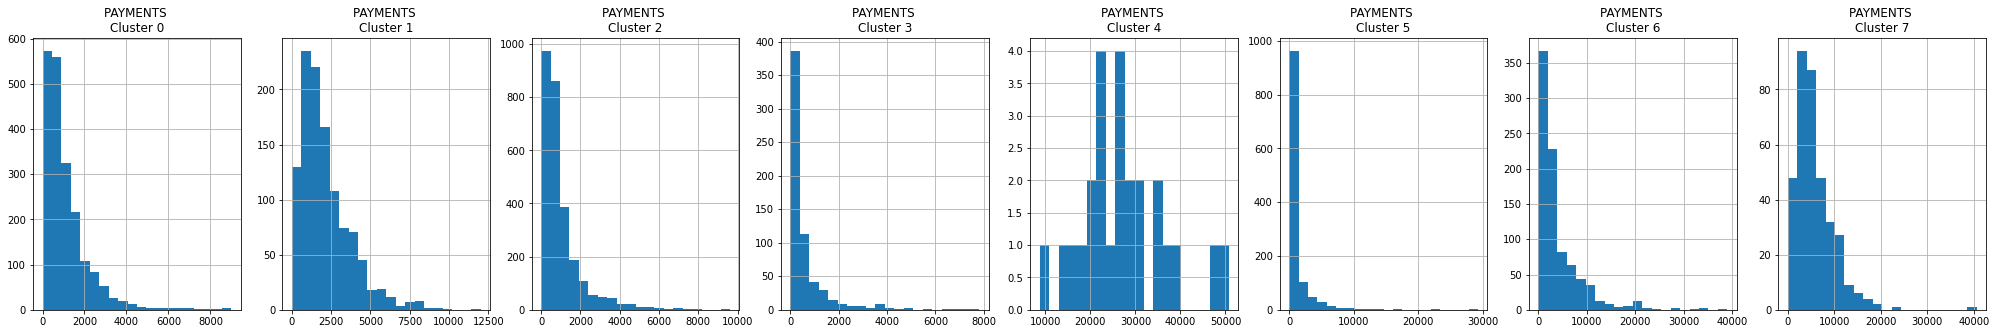

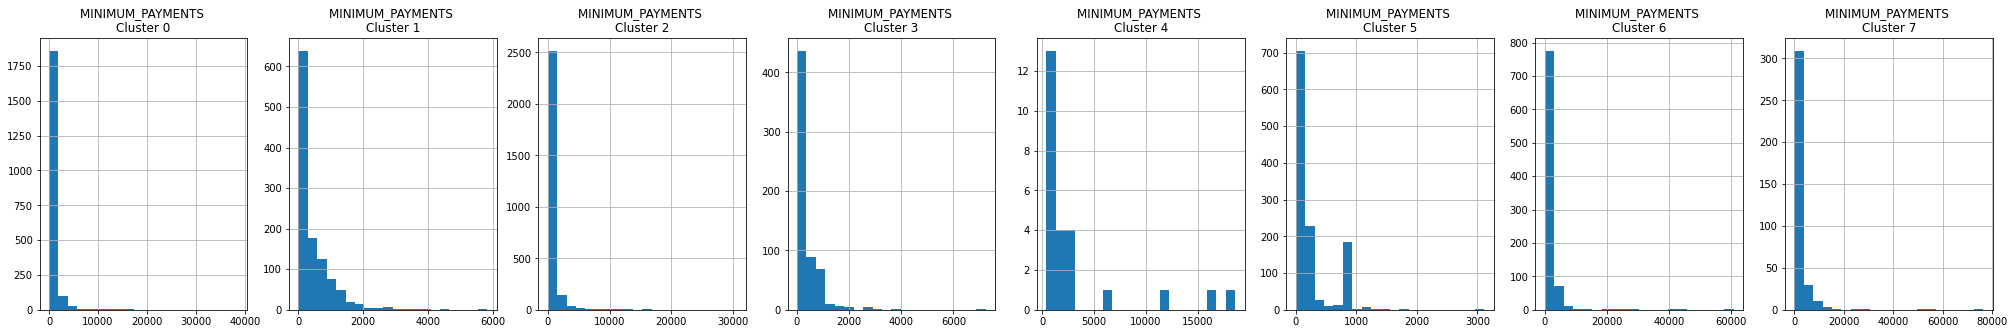

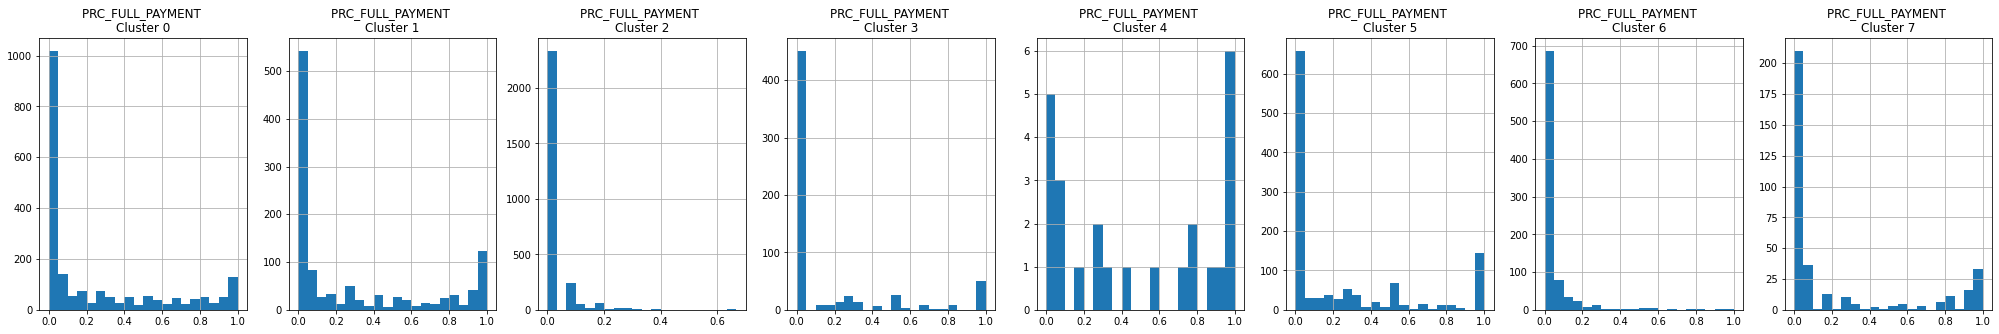

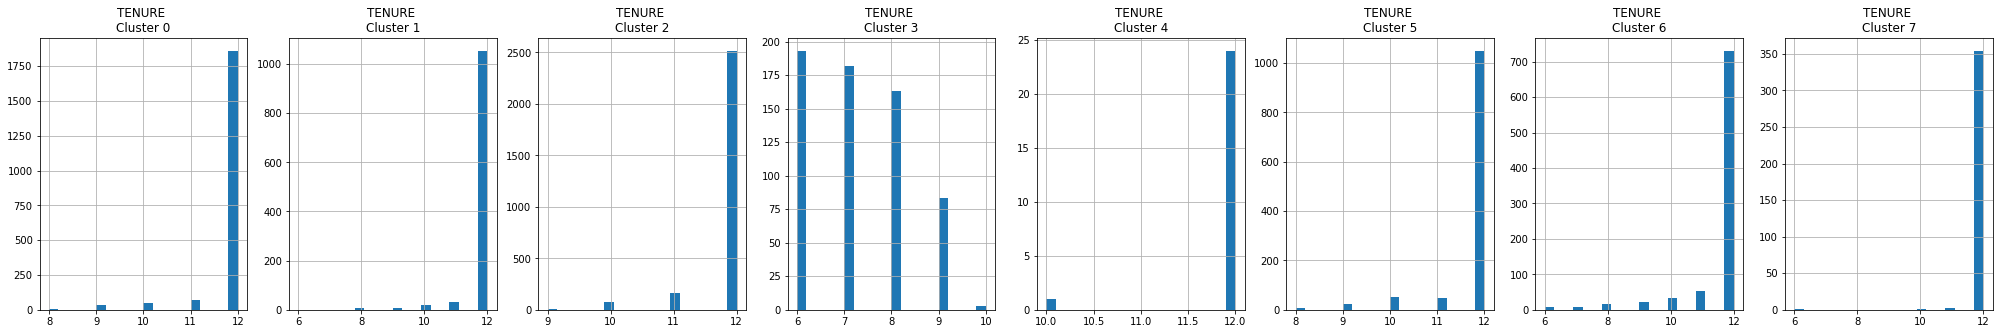

In [36]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [37]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'CLUSTER')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
7526,109.473217,1.0,1251.26,635.79,615.47,0.0,0.833333,0.25,0.666667,0.0,0,19,2700.0,958.931815,187.560093,0.250000,12,0
7416,1273.498021,1.0,449.28,0.00,449.28,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,475.727103,4224.383226,0.000000,12,0
1401,2849.474770,1.0,574.92,0.00,574.92,0.0,1.000000,0.00,1.000000,0.0,0,12,2500.0,3909.150905,5092.799300,0.000000,12,0
3447,11.736675,1.0,119.28,0.00,119.28,0.0,1.000000,0.00,1.000000,0.0,0,12,1700.0,115.257036,92.166894,0.444444,12,0
3449,1716.340133,1.0,184.23,0.00,184.23,0.0,1.000000,0.00,1.000000,0.0,0,13,1700.0,510.451516,833.346049,0.000000,12,0


In [38]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
3105,725.529062,1.000000,8754.59,8636.73,117.86,0.000000,1.00,1.000000,0.25,0.000000,0,116,4000.0,8648.305093,195.873012,0.916667,12,7
5338,8419.737786,1.000000,3050.48,1475.56,1574.92,2127.489462,1.00,1.000000,1.00,0.250000,5,67,12300.0,3298.741768,4239.303788,0.000000,12,7
295,635.090434,0.818182,5758.71,2252.37,3506.34,0.000000,0.75,0.250000,0.75,0.000000,0,48,2900.0,7943.570210,197.416104,1.000000,12,7
6153,881.358988,1.000000,4681.26,2301.64,2379.62,0.000000,1.00,0.583333,1.00,0.000000,0,53,7000.0,4675.820552,249.009390,0.000000,12,7
5649,2091.627351,1.000000,4361.04,2325.83,2035.21,4224.133411,1.00,0.666667,1.00,0.833333,27,109,2500.0,7608.515679,915.803727,0.083333,12,7


### TRANSFERING TO CSV

In [39]:
credit_ordered.to_csv('cluster.csv')

### APPLYING PCA (Principal Component Analysis) AND EDA

In [40]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222253, -1.07645401],
       [-1.13831321,  2.50641176],
       [ 0.96970601, -0.38344879],
       ...,
       [-0.92619958, -1.81076411],
       [-2.33655488, -0.65797333],
       [-0.55641699, -0.40046206]])

In [41]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682223,-1.076454
1,-1.138313,2.506412
2,0.969706,-0.383449
3,-0.873628,0.043173
4,-1.599436,-0.688587


In [42]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [43]:
pca_df

,pca1,pca2,cluster
0,-1.682223,-1.076454,2
1,-1.138313,2.506412,6
2,0.969706,-0.383449,1
3,-0.873628,0.043173,2
4,-1.599436,-0.688587,2
...,...,...,...
8945,-0.359627,-2.016130,3
8946,-0.564351,-1.639046,3
8947,-0.926200,-1.810764,3
8948,-2.336555,-0.657973,3


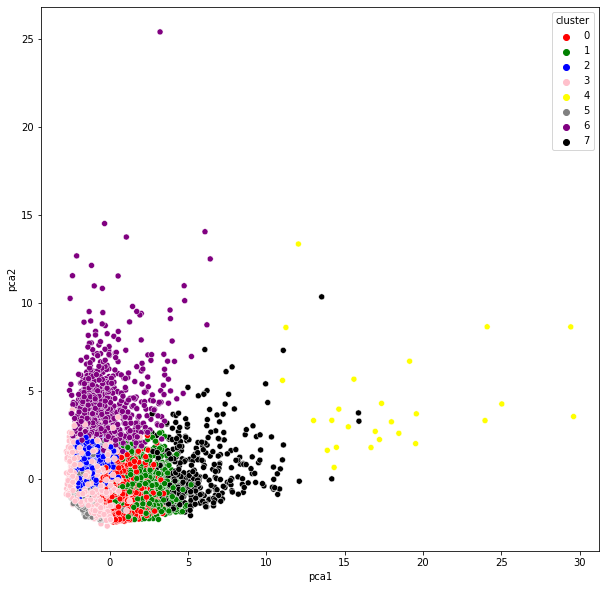

In [44]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

### APPLYING AUTOENCODERS

In [45]:
# Reduce from 18 to 10 attributes
# Elbow
# K-means
# PCA

In [46]:
creditcard_df_scaled.shape

(8950, 17)

In [47]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17

In [48]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [49]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [50]:
# Autoencoder
autoencoder = Model(input_df, decoded)

In [51]:
# Encoder
encoder = Model(input_df, encoded)

In [53]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [54]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 12s 39ms/step - loss: 0.2021
Epoch 2/50
280/280 [==============================] - 11s 40ms/step - loss: 0.0871
Epoch 3/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0587
Epoch 4/50
280/280 [==============================] - 11s 39ms/step - loss: 0.0555
Epoch 5/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0469
Epoch 6/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0812
Epoch 7/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0532
Epoch 8/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0409
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0326
Epoch 10/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0345
Epoch 11/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0324
Epoch 12/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0390
Epoch 13/

In [55]:
compact = encoder.predict(creditcard_df_scaled)

In [58]:
compact.shape

(8950, 10)

In [59]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(compact)
        wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

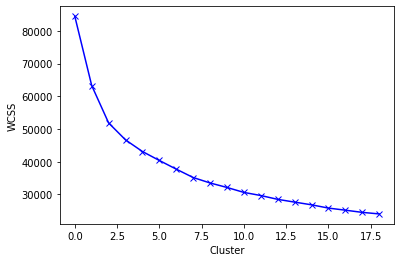

In [60]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

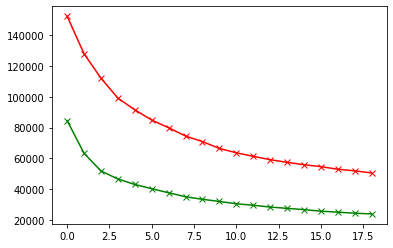

In [61]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g')

In [63]:
# Assuming 4 clusters

kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [66]:
labels = kmeans.labels_ 
labels, labels.shape

(array([2, 0, 2, ..., 0, 0, 3], dtype=int32), (8950,))

In [68]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [70]:
# Applying PCA again

pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.084006,-0.434332
1,0.817680,-0.666832
2,-1.625921,0.396297
3,0.017398,-0.840683
4,-1.371164,-0.252127


In [71]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.084006,-0.434332,2
1,0.817680,-0.666832,0
2,-1.625921,0.396297,2
3,0.017398,-0.840683,0
4,-1.371164,-0.252127,2


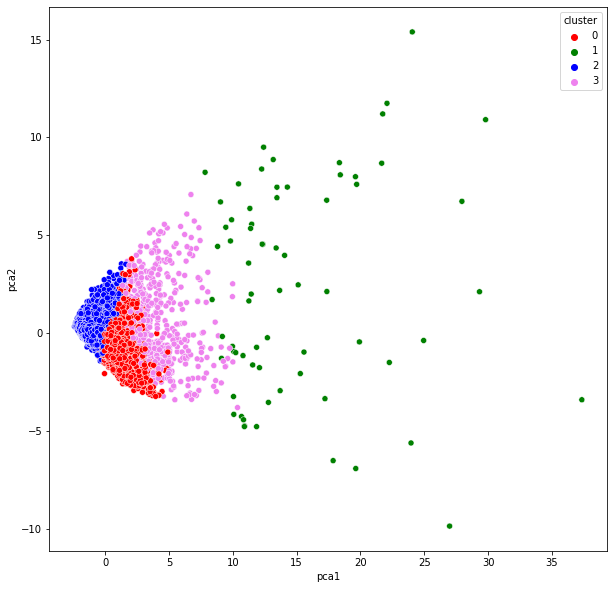

In [73]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'violet'])

Transfering to Excel

In [75]:
df_cluster_ordered = df_cluster_at.sort_values(by='CLUSTER')
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
df_cluster_ordered.to_excel('cluster_ordered.xls')